<a href="https://colab.research.google.com/github/npselvan/StockInventory/blob/stockphase1/NLP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size':'10'})

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data=pd.read_csv('/content/drive/MyDrive/Tweets.csv')

In [8]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
data.shape

(14640, 15)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [12]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640,NaN,NaN,NaN,5.69218e+17,7.79111e+14,5.67588e+17,5.68559e+17,5.69478e+17,5.6989e+17,5.70311e+17
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1,1,1
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522,NaN,NaN,NaN,0.638298,0.33044,0,0.3606,0.6706,1,1
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640,NaN,NaN,NaN,0.0826503,0.745778,0,0,0,0,44


In [13]:
df=data.copy()

In [14]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [15]:
df.drop(columns=['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis=1, inplace=True)

In [16]:
df.columns

Index(['airline_sentiment', 'text'], dtype='object')

In [17]:
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [18]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [20]:
df.shape

(14640, 2)

In [22]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [23]:
df['text'].nunique()

14427

In [24]:
import re
import nltk

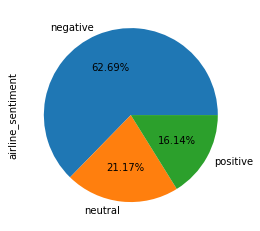

In [30]:
df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.2f%%')

The tweet reflect close to 2 in 3 passengers are unhappy with the Airline Service. Only 16% of the Passengers are happy with the Airlines. 21% of the people expressed neutral airline services. 

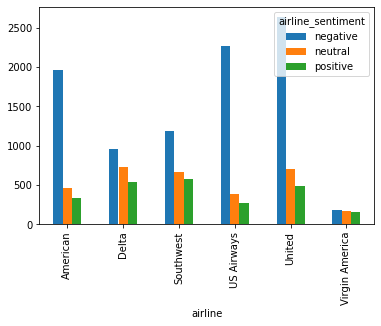

In [34]:
df2=data.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
df2.plot(kind='bar')

In [48]:
df3['new_text'] = [BeautifulSoup(txt).get_text() for txt in df3['text']]

In [57]:
ahtml= '<html><head><body><h2>Welcome to BeautifulSoup Programming</h2></body></head></html>'
BeautifulSoup(ahtml).get_text()

'Welcome to BeautifulSoup Programming'

In [49]:
df3.head()

,airline_sentiment,text,new_text
0,neutral,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...,@VirginAmerica and it's a really big bad thing...


In [52]:
df3[df3['text'].str.contains('<')==False]

,airline_sentiment,text,new_text
0,neutral,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,positive,@AmericanAir thank you we got on a different f...,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ...","@AmericanAir you have my money, you change my ..."


There is no any HTML tags in the text

### Tokenization

In [71]:
df3['new_text']=[BeautifulSoup(txt).get_text() for txt in df3['text']]

In [74]:
df3.shape

(14640, 3)

In [81]:
from nltk.tokenize import TweetTokenizer
tt=TweetTokenizer()
df3['tweet_tokens']=df3['new_text'].apply(tt.tokenize)
df3.head()

,airline_sentiment,text,new_text,tweet_tokens
0,neutral,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.,"[@VirginAmerica, What, @dhepburn, said, .]"
1,positive,@VirginAmerica plus you've added commercials t...,@VirginAmerica plus you've added commercials t...,"[@VirginAmerica, plus, you've, added, commerci..."
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@VirginAmerica I didn't today... Must mean I n...,"[@VirginAmerica, I, didn't, today, ..., Must, ..."
3,negative,@VirginAmerica it's really aggressive to blast...,@VirginAmerica it's really aggressive to blast...,"[@VirginAmerica, it's, really, aggressive, to,..."
4,negative,@VirginAmerica and it's a really big bad thing...,@VirginAmerica and it's a really big bad thing...,"[@VirginAmerica, and, it's, a, really, big, ba..."


**Remove Numbers from the text**

In [95]:
df4 = df.copy()

In [96]:
df4.drop_duplicates()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [97]:
df.shape

(14640, 2)

In [105]:
df3['nonnumeric_text']= [re.sub(r'[0-9]',"",txt) for txt in df3['new_text']]


In [106]:
df3[df3['text'].str.contains('1')]

,airline_sentiment,text,new_text,tweet_tokens,nonnumeric_text
10,neutral,@VirginAmerica did you know that suicide is th...,@VirginAmerica did you know that suicide is th...,"[@VirginAmerica, did, you, know, that, suicide...",@VirginAmerica did you know that suicide is th...
12,positive,@VirginAmerica This is such a great deal! Alre...,@VirginAmerica This is such a great deal! Alre...,"[@VirginAmerica, This, is, such, a, great, dea...",@VirginAmerica This is such a great deal! Alre...
48,neutral,@VirginAmerica @ladygaga @carrieunderwood Afte...,@VirginAmerica @ladygaga @carrieunderwood Afte...,"[@VirginAmerica, @ladygaga, @carrieunderwood, ...",@VirginAmerica @ladygaga @carrieunderwood Afte...
61,negative,@VirginAmerica I called a 3-4 weeks ago about ...,@VirginAmerica I called a 3-4 weeks ago about ...,"[@VirginAmerica, I, called, a, 3-4, weeks, ago...",@VirginAmerica I called a - weeks ago about ad...
65,neutral,@VirginAmerica Flight 0736 DAL to DCA 2/24 2:1...,@VirginAmerica Flight 0736 DAL to DCA 2/24 2:1...,"[@VirginAmerica, Flight, 0736, DAL, to, DCA, 2...",@VirginAmerica Flight DAL to DCA / :pm. Tried...
...,...,...,...,...,...
14620,negative,@AmericanAir I wait 2+ hrs for CS to call me b...,@AmericanAir I wait 2+ hrs for CS to call me b...,"[@AmericanAir, I, wait, 2, +, hrs, for, CS, to...",@AmericanAir I wait + hrs for CS to call me ba...
14626,negative,@AmericanAir Flight 953 NYC-Buenos Aires has b...,@AmericanAir Flight 953 NYC-Buenos Aires has b...,"[@AmericanAir, Flight, 953, NYC-Buenos, Aires,...",@AmericanAir Flight NYC-Buenos Aires has been...
14632,neutral,"“@AmericanAir: @TilleyMonsta George, that does...","“@AmericanAir: @TilleyMonsta George, that does...","[“, @AmericanAir, :, @TilleyMonsta, George, ,,...","“@AmericanAir: @TilleyMonsta George, that does..."
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...,@AmericanAir leaving over 20 minutes Late Flig...,"[@AmericanAir, leaving, over, 20, minutes, Lat...",@AmericanAir leaving over minutes Late Flight...


**Removing Special Characters, Punctuation Marks**

In [110]:
import string
df3['NonPunctuated']=[txt.translate(str.maketrans('','',string.punctuation)) for txt in df3['new_text']]
df3.head()

,airline_sentiment,text,new_text,tweet_tokens,nonnumeric_text,NonSpecialCharacter,NonPunctuated
0,neutral,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.,"[@VirginAmerica, What, @dhepburn, said, .]",@VirginAmerica What @dhepburn said.,VirginAmericaWhatdhepburnsaid,VirginAmerica What dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,@VirginAmerica plus you've added commercials t...,"[@VirginAmerica, plus, you've, added, commerci...",@VirginAmerica plus you've added commercials t...,VirginAmericaplusyouveaddedcommercialstotheexp...,VirginAmerica plus youve added commercials to ...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@VirginAmerica I didn't today... Must mean I n...,"[@VirginAmerica, I, didn't, today, ..., Must, ...",@VirginAmerica I didn't today... Must mean I n...,VirginAmericaIdidnttodayMustmeanIneedtotakeano...,VirginAmerica I didnt today Must mean I need t...
3,negative,@VirginAmerica it's really aggressive to blast...,@VirginAmerica it's really aggressive to blast...,"[@VirginAmerica, it's, really, aggressive, to,...",@VirginAmerica it's really aggressive to blast...,VirginAmericaitsreallyaggressivetoblastobnoxio...,VirginAmerica its really aggressive to blast o...
4,negative,@VirginAmerica and it's a really big bad thing...,@VirginAmerica and it's a really big bad thing...,"[@VirginAmerica, and, it's, a, really, big, ba...",@VirginAmerica and it's a really big bad thing...,VirginAmericaanditsareallybigbadthingaboutit,VirginAmerica and its a really big bad thing a...


In [111]:
df3[df3['new_text'].str.contains('!')]

,airline_sentiment,text,new_text,tweet_tokens,nonnumeric_text,NonSpecialCharacter,NonPunctuated
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@VirginAmerica I didn't today... Must mean I n...,"[@VirginAmerica, I, didn't, today, ..., Must, ...",@VirginAmerica I didn't today... Must mean I n...,VirginAmericaIdidnttodayMustmeanIneedtotakeano...,VirginAmerica I didnt today Must mean I need t...
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D","@virginamerica Well, I didn't…but NOW I DO! :-D","[@virginamerica, Well, ,, I, didn't, …, but, N...","@virginamerica Well, I didn't…but NOW I DO! :-D",virginamericaWellIdidntbutNOWIDOD,virginamerica Well I didnt…but NOW I DO D
12,positive,@VirginAmerica This is such a great deal! Alre...,@VirginAmerica This is such a great deal! Alre...,"[@VirginAmerica, This, is, such, a, great, dea...",@VirginAmerica This is such a great deal! Alre...,VirginAmericaThisissuchagreatdealAlreadythinki...,VirginAmerica This is such a great deal Alread...
13,positive,@VirginAmerica @virginmedia I'm flying your #f...,@VirginAmerica @virginmedia I'm flying your #f...,"[@VirginAmerica, @virginmedia, I'm, flying, yo...",@VirginAmerica @virginmedia I'm flying your #f...,VirginAmericavirginmediaImflyingyourfabulousSe...,VirginAmerica virginmedia Im flying your fabul...
14,positive,@VirginAmerica Thanks!,@VirginAmerica Thanks!,"[@VirginAmerica, Thanks, !]",@VirginAmerica Thanks!,VirginAmericaThanks,VirginAmerica Thanks
...,...,...,...,...,...,...,...
14622,negative,I just need a place to sleep when I land witho...,I just need a place to sleep when I land witho...,"[I, just, need, a, place, to, sleep, when, I, ...",I just need a place to sleep when I land witho...,IjustneedaplacetosleepwhenIlandwithoutaccommod...,I just need a place to sleep when I land witho...
14626,negative,@AmericanAir Flight 953 NYC-Buenos Aires has b...,@AmericanAir Flight 953 NYC-Buenos Aires has b...,"[@AmericanAir, Flight, 953, NYC-Buenos, Aires,...",@AmericanAir Flight NYC-Buenos Aires has been...,AmericanAirFlight953NYCBuenosAireshasbeendelay...,AmericanAir Flight 953 NYCBuenos Aires has bee...
14627,negative,"@AmericanAir Flight Cancelled Flightled, can't...","@AmericanAir Flight Cancelled Flightled, can't...","[@AmericanAir, Flight, Cancelled, Flightled, ,...","@AmericanAir Flight Cancelled Flightled, can't...",AmericanAirFlightCancelledFlightledcantgohomeu...,AmericanAir Flight Cancelled Flightled cant go...
14630,positive,@AmericanAir Thanks! He is.,@AmericanAir Thanks! He is.,"[@AmericanAir, Thanks, !, He, is, .]",@AmericanAir Thanks! He is.,AmericanAirThanksHeis,AmericanAir Thanks He is
